# R script

*** 
###  

In [1]:
library(ggplot2)
library(dplyr)
library(viridis)
library(ggpointdensity)
library(RColorBrewer)

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



In [2]:
PA1_circ_rep1 <- read.csv("./01_PA1_steady_ribominus_rep1_circRNA.txt",sep ='\t',header = F)
PA1_circ_rep2 <- read.csv("./01_PA1_steady_ribominus_rep2_circRNA.txt",sep ='\t',header = F)

PA1_ci_rep1 <- read.csv("./01_PA1_steady_ribominus_rep1_ciRNA.txt",sep ='\t',header = F)
PA1_ci_rep2 <- read.csv("./01_PA1_steady_ribominus_rep2_ciRNA.txt",sep ='\t',header = F)

In [3]:
rownames(PA1_circ_rep1) = paste(PA1_circ_rep1$V1,PA1_circ_rep1$V2,PA1_circ_rep1$V3,PA1_circ_rep1$V6,PA1_circ_rep1$V16,sep = '_')
rownames(PA1_circ_rep2) = paste(PA1_circ_rep2$V1,PA1_circ_rep2$V2,PA1_circ_rep2$V3,PA1_circ_rep2$V6,PA1_circ_rep2$V16,sep = '_')

rownames(PA1_ci_rep1) = paste(PA1_ci_rep1$V1,PA1_ci_rep1$V2,PA1_ci_rep1$V3,PA1_ci_rep1$V6,PA1_ci_rep1$V16,sep = '_')
rownames(PA1_ci_rep2) = paste(PA1_ci_rep2$V1,PA1_ci_rep2$V2,PA1_ci_rep2$V3,PA1_ci_rep2$V6,PA1_ci_rep2$V16,sep = '_')

# circRNA

In [4]:
circ_names = union(rownames(PA1_circ_rep1),rownames(PA1_circ_rep2))
circ_exp_df <- data.frame(list(circRNA=circ_names,FPB_circ_rep1 = 0,FPB_circ_rep2 = 0))
rownames(circ_exp_df) <- circ_exp_df$circRNA

In [5]:
circ_exp_df[rownames(PA1_circ_rep1),]$FPB_circ_rep1 <- PA1_circ_rep1$V19
circ_exp_df[rownames(PA1_circ_rep2),]$FPB_circ_rep2 <- PA1_circ_rep2$V19
circ_exp_df$mean_FPB_circ <- (circ_exp_df$FPB_circ_rep1+circ_exp_df$FPB_circ_rep2) /2 

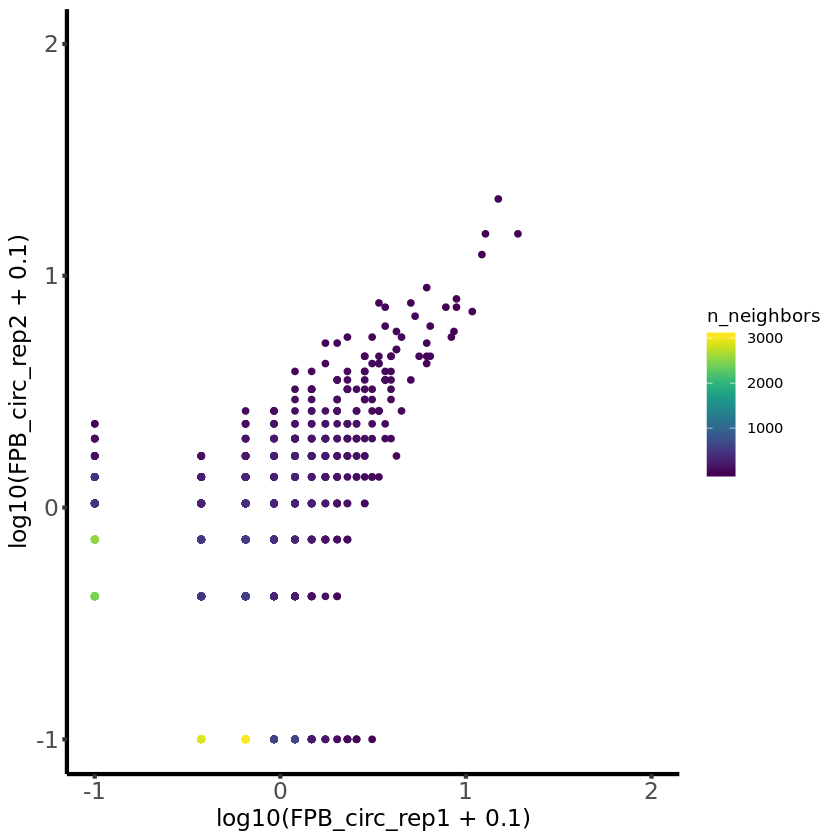

In [6]:
p_point_circ <-  ggplot(data = circ_exp_df, mapping = aes(x = log10(FPB_circ_rep1+0.1), y = log10(FPB_circ_rep2+0.1))) + geom_pointdensity(adjust = 1) + scale_color_viridis() + 
xlim(-1,2)+ylim(-1,2)+
theme_classic()+theme(axis.text = element_text(size=14),axis.title = element_text(size=14),element_line(size = 1.2))
p_point_circ

ggsave("02_PA1_circRNA_rep1_rep2_point_with_text.pdf", p_point_circ, width = 10, height = 10)

In [7]:
cor.test(circ_exp_df$FPB_circ_rep1,circ_exp_df$FPB_circ_rep2,method = "pearson")


	Pearson's product-moment correlation

data:  circ_exp_df$FPB_circ_rep1 and circ_exp_df$FPB_circ_rep2
t = 90.674, df = 6765, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7297283 0.7512457
sample estimates:
      cor 
0.7406768 


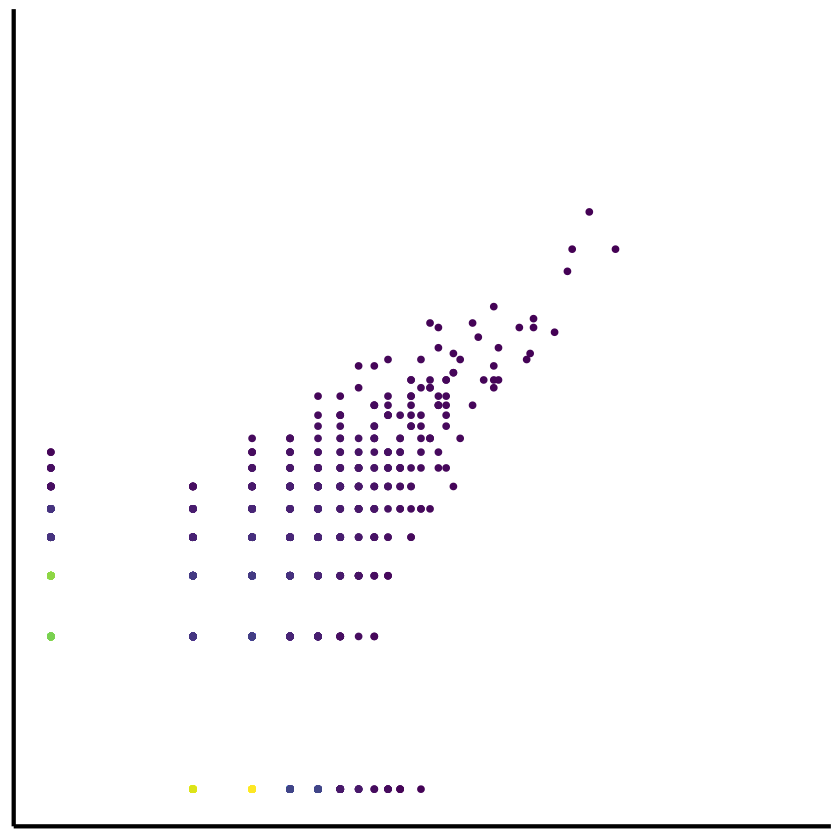

In [8]:
p_point_circ <- p_point_circ + theme(legend.position='none')+
theme(axis.text = element_blank(),axis.ticks = element_blank(),axis.title = element_blank())
p_point_circ 

ggsave("02_PA1_circRNA_rep1_rep2_point.pdf", p_point_circ, width = 10, height = 10)

In [9]:
high_circ_exp_df <- circ_exp_df[circ_exp_df$mean_FPB_circ>0.5,]
high_circ_exp_df$circRNA <- as.character(high_circ_exp_df$circRNA)
high_exp_circ_info_df <- t(data.frame(strsplit(high_circ_exp_df$circRNA,"_")))
colnames(high_exp_circ_info_df)<- c("chr","start","end","strand","ensembl_transcript_id")
high_exp_circ_info_df <- cbind(high_exp_circ_info_df,high_circ_exp_df[,2:4],stringsAsFactors = F)

In [10]:
nrow(circ_exp_df)

[1] 6767

In [11]:
nrow(high_exp_circ_info_df)

[1] 800

# ciRNA

In [12]:
ci_names = union(rownames(PA1_ci_rep1),rownames(PA1_ci_rep2))
ci_exp_df <- data.frame(list(ciRNA=ci_names,FPB_circ_rep1 = 0,FPB_circ_rep2 = 0))
rownames(ci_exp_df) <- ci_exp_df$ciRNA

In [13]:
ci_exp_df[rownames(PA1_ci_rep1),]$FPB_circ_rep1 <- PA1_ci_rep1$V19
ci_exp_df[rownames(PA1_ci_rep2),]$FPB_circ_rep2 <- PA1_ci_rep2$V19
ci_exp_df$mean_FPB_circ <- (ci_exp_df$FPB_circ_rep1+ci_exp_df$FPB_circ_rep2) /2 

In [14]:
p_point_ci <-  ggplot(data = ci_exp_df, mapping = aes(x = log10(FPB_circ_rep1+0.1), y = log10(FPB_circ_rep2+0.1))) + geom_pointdensity(adjust = 1) + scale_color_viridis() + 
xlim(-1,2)+ylim(-1,2)+
theme_classic()+theme(axis.text = element_text(size=14),axis.title = element_text(size=14),element_line(size = 1.2))

ggsave("02_PA1_ciRNA_rep1_rep2_point_with_text.pdf", p_point_ci, width = 10, height = 10)

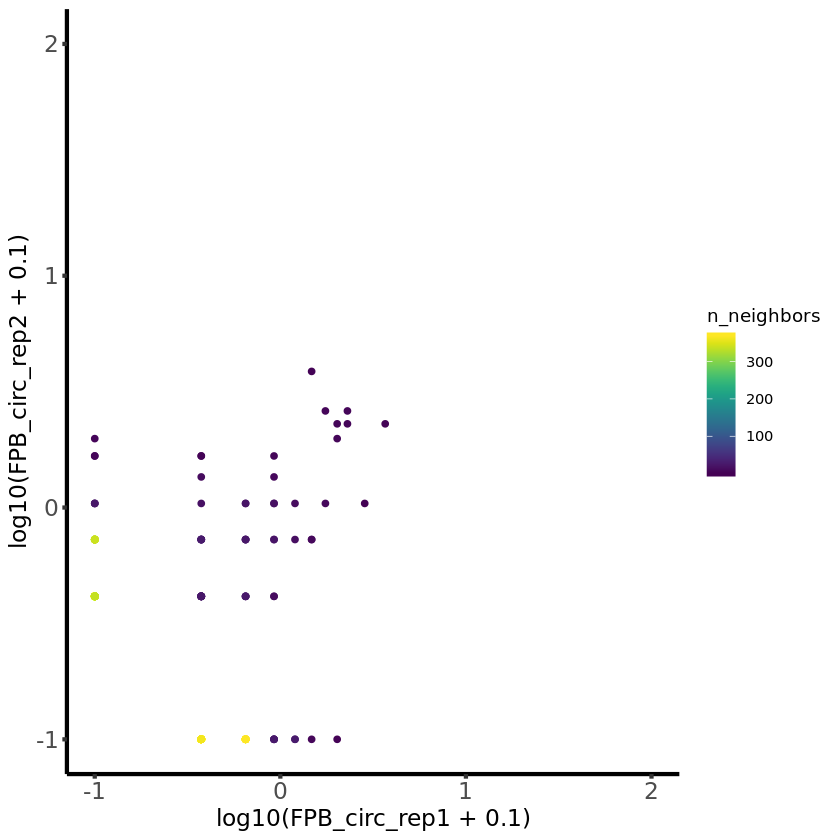

In [15]:
p_point_ci

In [16]:
cor.test(ci_exp_df$FPB_circ_rep1,ci_exp_df$FPB_circ_rep2,method = "pearson")


	Pearson's product-moment correlation

data:  ci_exp_df$FPB_circ_rep1 and ci_exp_df$FPB_circ_rep2
t = 7.9099, df = 764, p-value = 9.028e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2083500 0.3393491
sample estimates:
      cor 
0.2751261 


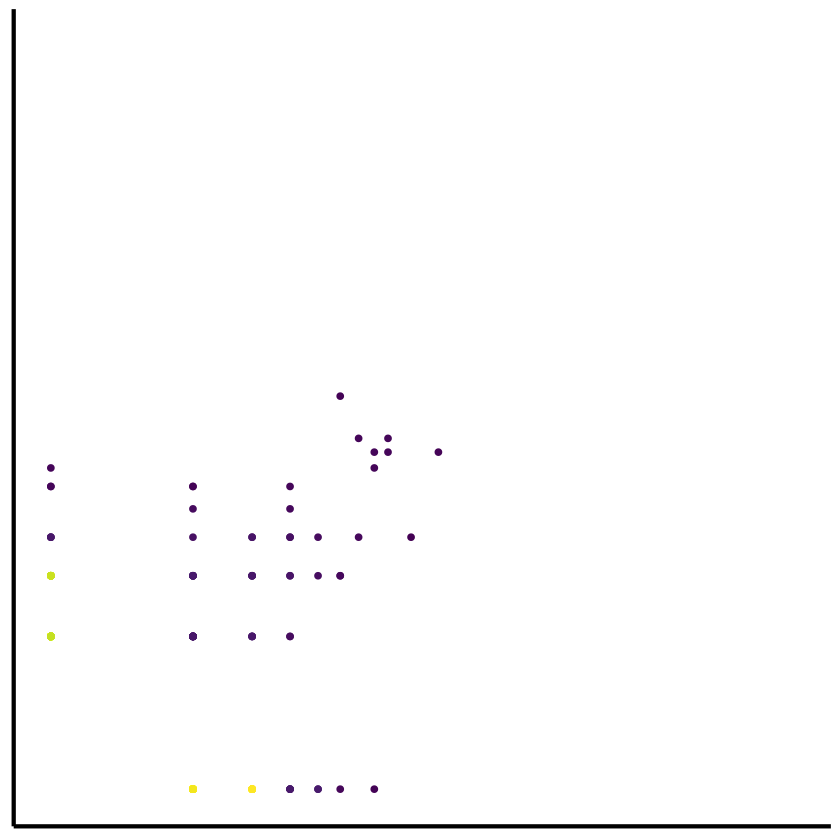

In [17]:
p_point_ci <- p_point_ci + theme(legend.position='none') +
theme(axis.text = element_blank(),axis.ticks = element_blank(),axis.title = element_blank())
p_point_ci

ggsave("02_PA1_ciRNA_rep1_rep2_point.pdf", p_point_ci, width = 10, height = 10)

In [18]:
high_ci_exp_df <- ci_exp_df[ci_exp_df$mean_FPB_circ>0.2,]
high_ci_exp_df$ciRNA <- as.character(high_ci_exp_df$ciRNA)
high_exp_ci_info_df <- t(data.frame(strsplit(high_ci_exp_df$ciRNA,"_")))
colnames(high_exp_ci_info_df)<- c("chr","start","end","strand","ensembl_transcript_id")
high_exp_ci_info_df <- cbind(high_exp_ci_info_df,high_ci_exp_df[,2:4],stringsAsFactors = F)

In [19]:
nrow(ci_exp_df)

[1] 766

In [20]:
nrow(high_exp_ci_info_df)

[1] 104

In [21]:
write.table(high_exp_circ_info_df,"02_PA1_high_exp_circ_info.tsv",sep = '\t',row.names = F,quote = F)
write.table(high_exp_ci_info_df,"02_PA1_high_exp_ci_info.tsv",sep = '\t',row.names = F,quote = F)